In [40]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import spline
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

In [41]:
img = util.ExampleImages().image('e.jpg', scaled=True,
                                 idxexp=np.s_[:,:], gray=True)

In [42]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.44)

In [43]:
lmbda = 5.0
opt = spline.SplineL1.Options({'Verbose': True, 'gEvalY': False})

In [44]:
b = spline.SplineL1(imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      Reg       r         s         ρ       
----------------------------------------------------------------
   0  9.75e+04  7.36e+04  4.79e+03  3.60e-01  5.20e+00  1.01e+01
   1  7.77e+04  7.43e+04  6.84e+02  2.07e-01  2.86e+00  1.01e+01
   2  7.46e+04  7.10e+04  7.29e+02  2.04e-01  7.40e-01  2.71e+00
   3  9.16e+04  8.97e+04  3.88e+02  2.15e-01  2.05e-01  1.42e+00
   4  7.26e+04  7.11e+04  2.99e+02  1.50e-01  2.61e-01  1.42e+00
   5  7.03e+04  6.86e+04  3.47e+02  1.21e-01  1.43e-01  1.08e+00
   6  7.42e+04  7.26e+04  3.22e+02  9.79e-02  9.46e-02  1.08e+00
   7  6.97e+04  6.82e+04  2.99e+02  7.37e-02  8.37e-02  1.08e+00
   8  6.76e+04  6.61e+04  3.15e+02  5.56e-02  6.37e-02  1.08e+00
   9  6.83e+04  6.68e+04  3.08e+02  4.44e-02  4.49e-02  1.08e+00
  10  6.72e+04  6.56e+04  3.05e+02  3.44e-02  3.44e-02  1.08e+00
  11  6.66e+04  6.50e+04  3.06e+02  2.75e-02  2.79e-02  1.08e+00
  12  6.66e+04  6.50e+04  3.07e+02  2.30e-02  2.01e-02  1.08e+00
  13  6.63e+04  6.48e+04 

In [45]:
print("SplineL1 solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

SplineL1 solve time: 33.56 s
Noisy image PSNR:     6.35 dB
Denoised image PSNR: 31.23 dB


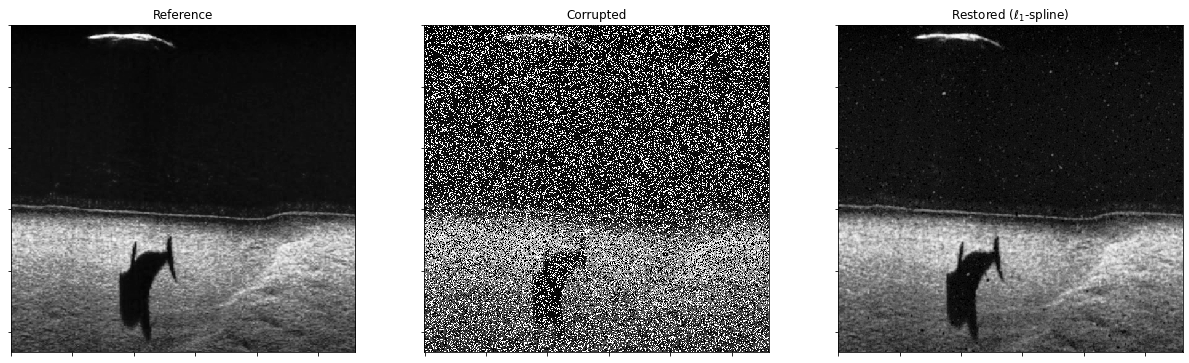

In [46]:
fig = plot.figure(figsize=(21, 7))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-spline)', fig=fig)
fig.show()

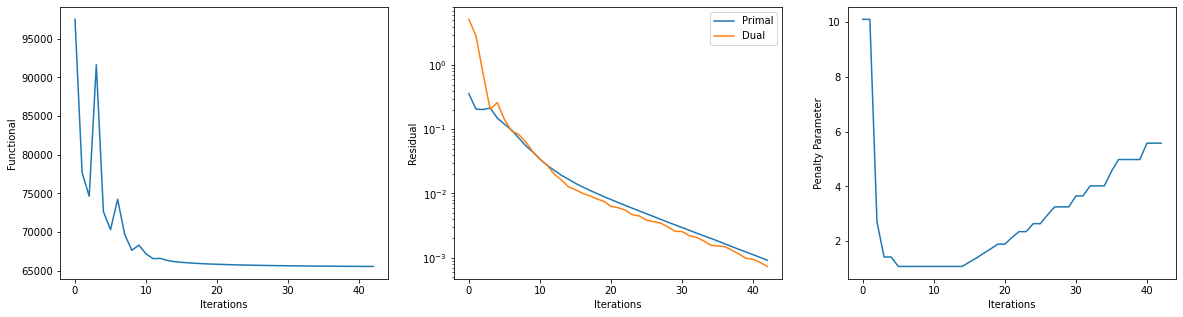

In [47]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

In [48]:
from skimage.metrics import structural_similarity as ssim
ssim_const_1 = ssim(img, imgr,
                  data_range=imgr.max() - imgr.min(), multichannel=True)

print(ssim_const_1)#structure similarity between two random variables -it measures contrast,variance,mean, luminous,covariance 

0.8161723660123003
